<span style="color:red">Assignment Grade: float (0.0--10.0)</span>

  Q 1: 9.0

  Q 2.1: 9.5

  Q 2.2: 10.0

  Q 2.3: 10.0

  Q 2.4: 10.0

  Comments from pre-grade: Your homework is ready for grading. Tue. Jan 30 at 00:00:11 

  TA comments: For Q1 remember to include the commands you used in this file. Q2.1, provide to 3 decimal places. 


In [1]:
#setup environment
%pylab nbagg
import sys
from functions import gauss
from integrate import sym_gauss_int_sqr

Populating the interactive namespace from numpy and matplotlib


In [2]:
try:
    f = open('gaus_int.out', '+w')
    f.write("The return value from the Gaussian function with default parameters: %0.2f\n" % gauss(1))
except IOError as ex:
    print(str(ex))

Param **a** is the vertical scale

Param **b** is the x-axis offset

Param **c** is the standard deviation (y-axis scale)

<IPython.core.display.Javascript object>


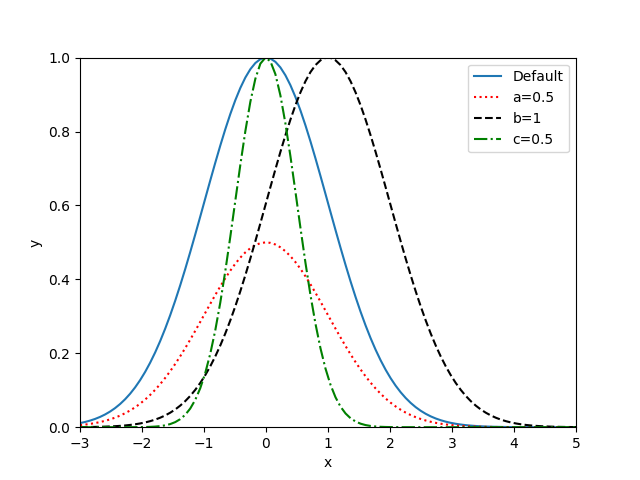

In [3]:
n = 100
x = linspace(-3, 5, n)
plot(x, gauss(x), label="Default")
plot(x, gauss(x, a=0.5), 'r:', label="a=0.5")
plot(x, gauss(x, b=1), 'k--', label="b=1")
plot(x, gauss(x, c=0.5), 'g-.', label="c=0.5")
xlim(x[0], x[-1])
ylim(0, 1)
xlabel("x")
ylabel("y")
axis()
legend()

In [4]:
f.write("The area squared from [-3, 3] is pi:\n%.2f\n" % sym_gauss_int_sqr(3))

42

In [5]:
'''
This computes relative error, as getting a percent precision requires relative computation. The repoting string 
suggests an absolute computation. Both are included, but the absolute error algorithm has been commented out.
'''
xb = 3
xt = np.pi
bound = 0
# old = 10000000
for i in range(1,50):
    p = sym_gauss_int_sqr(xb, n=int(i))
#     if abs(old - p) < 1e-3:
#         bound = i
#         f.write("The precision is better than 1.0e-3 for n >={}\n".format(i))
#         break
#     old = p
    err = 100*abs(xt - p)/xt
    if err <= 0.1:
        bound = i
        f.write("The precision is better than 1.0e-3 for n >=%d\n" % i)
        break

In [6]:
'''
Assuming the 'square of the area' means area squared, and not the square root of the area. Both cases are similar but 
with small answer differences. 
'''
for i in np.linspace(0, 10, 100):
    p = sym_gauss_int_sqr(i, n=bound)
    if p/xt >= 0.99:
        f.write("Interval boundary >= %.2f for > 99%% of the square of the indefinite integral included.\n" % i)
        break

In [7]:
x2 = np.linspace(-1, 1.2, 100)
y2 = np.linspace(-1, 1.5, 100)
xv, yv = np.meshgrid(x2, y2)
z = np.exp(-(xv**2+yv**2))

<IPython.core.display.Javascript object>


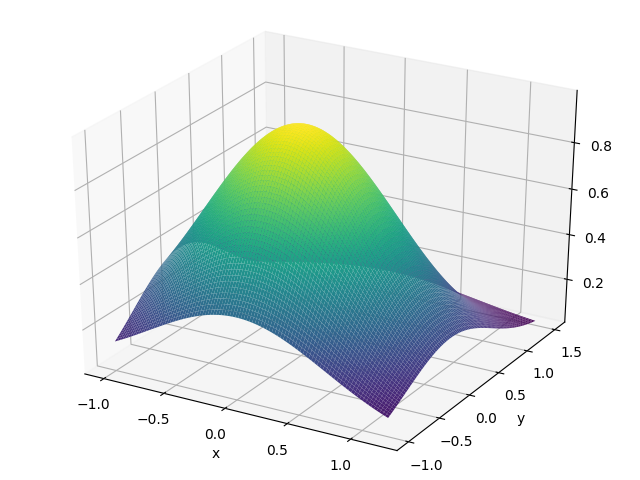

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
xlabel("x")
ylabel("y")
ax.plot_surface(xv,yv,z, rstride=1, cstride=1, cmap=cm.viridis)
plt.show()

<IPython.core.display.Javascript object>


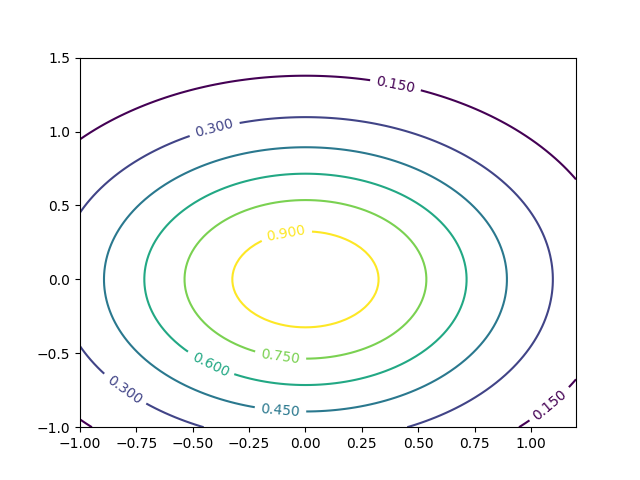

<a list of 8 text.Text objects>

In [9]:
figure()
CS = plt.contour(xv, yv, z)
plt.clabel(CS, inline=1, fontsize=10)

In [10]:
f.close()